## Deep Learning model on stress level dataset

### Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib.metadata import version
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

print("Using Numpy version:", version("numpy"))
print("Using Pandas version:", version("pandas"))
print("Using Matplotlib version:", version("matplotlib"))
print("Using Scikit-learn version:", version("Scikit-learn"))
print("Using Seaborn version:", version("seaborn"))


Using Numpy version: 1.23.5
Using Pandas version: 2.2.3
Using Matplotlib version: 3.10.0
Using Scikit-learn version: 1.6.1
Using Seaborn version: 0.13.2


### Data Exploration

Now, let's analyze the dataset first. We will print the first few rows of the dataset and will look for missing values. We will develop a model to predict the stress level of individuals.

In [60]:
data = pd.read_csv("StressLevelDataset.csv")
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [61]:
data.describe(include="all")

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [63]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

As described above, the dataset is complete and can be worked on immediately. But before modeling, let's do EDA (Exploratory Data Analysis).

In [64]:
print(f"The column names are {data.columns}")

The column names are Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


### Data Visualization

now let's look at the different plots of the dataset

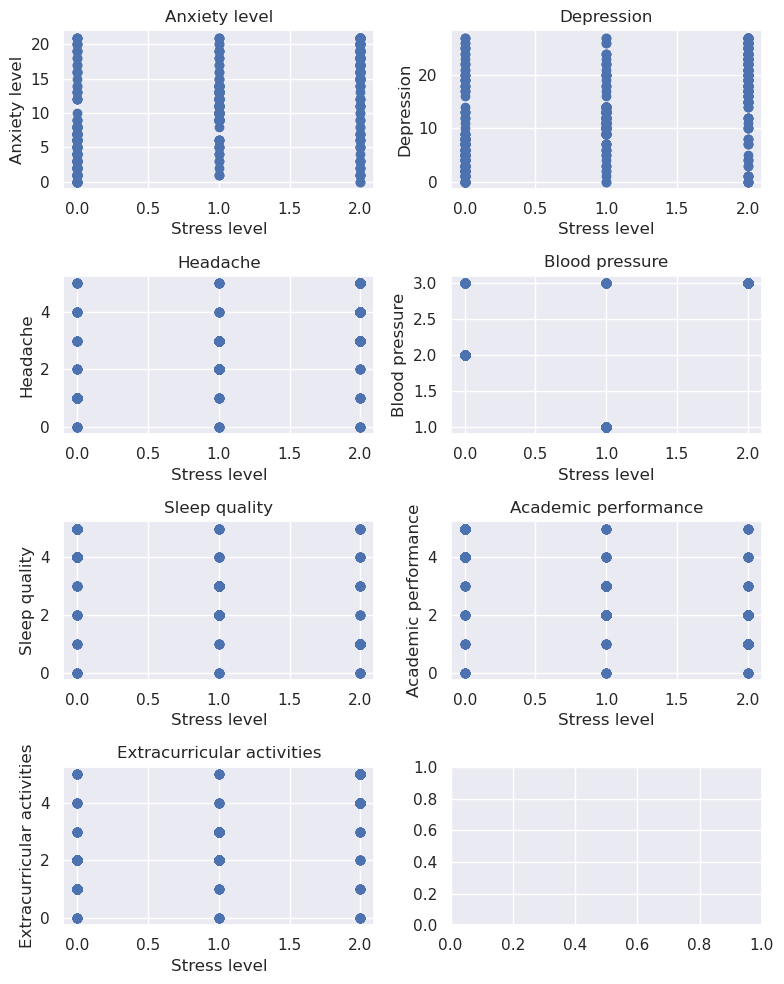

In [79]:
#making subplots of different variables
figure, axis = plt.subplots(4, 2, figsize=(8,10))

#plot for anxiety level vs stress level
axis[0, 0].scatter(data["stress_level"], data["anxiety_level"])
axis[0, 0].set_title("Anxiety level")
axis[0, 0].set_xlabel("Stress level")
axis[0, 0].set_ylabel("Anxiety level")

#plot for depression vs stress level
axis[0,1].scatter(data["stress_level"], data["depression"])
axis[0,1].set_title("Depression")
axis[0, 1].set_xlabel("Stress level")
axis[0, 1].set_ylabel("Depression")

#plot for headache vs stress level
axis[1,0].scatter(data["stress_level"], data["headache"])
axis[1,0].set_title("Headache")
axis[1,0].set_xlabel("Stress level")
axis[1,0].set_ylabel("Headache")


#plot for blood pressure vs stress level
axis[1,1].scatter(data["stress_level"], data["blood_pressure"])
axis[1,1].set_title("Blood pressure")
axis[1,1].set_xlabel("Stress level")
axis[1,1].set_ylabel("Blood pressure")

#plot for sleep quality vs stress level
axis[2,0].scatter(data["stress_level"], data["sleep_quality"])
axis[2,0].set_title("Sleep quality")
axis[2,0].set_xlabel("Stress level")
axis[2,0].set_ylabel("Sleep quality")

#plot for academic performance vs stress level
axis[2,1].scatter(data["stress_level"], data["academic_performance"])
axis[2,1].set_title("Academic performance")
axis[2,1].set_xlabel("Stress level")
axis[2,1].set_ylabel("Academic performance")

#plot for extracurricular activities vs stress level
axis[3,0].scatter(data["stress_level"], data["extracurricular_activities"])
axis[3,0].set_title("Extracurricular activities")
axis[3,0].set_xlabel("Stress level")
axis[3,0].set_ylabel("Extracurricular activities")

plt.tight_layout()
plt.show()

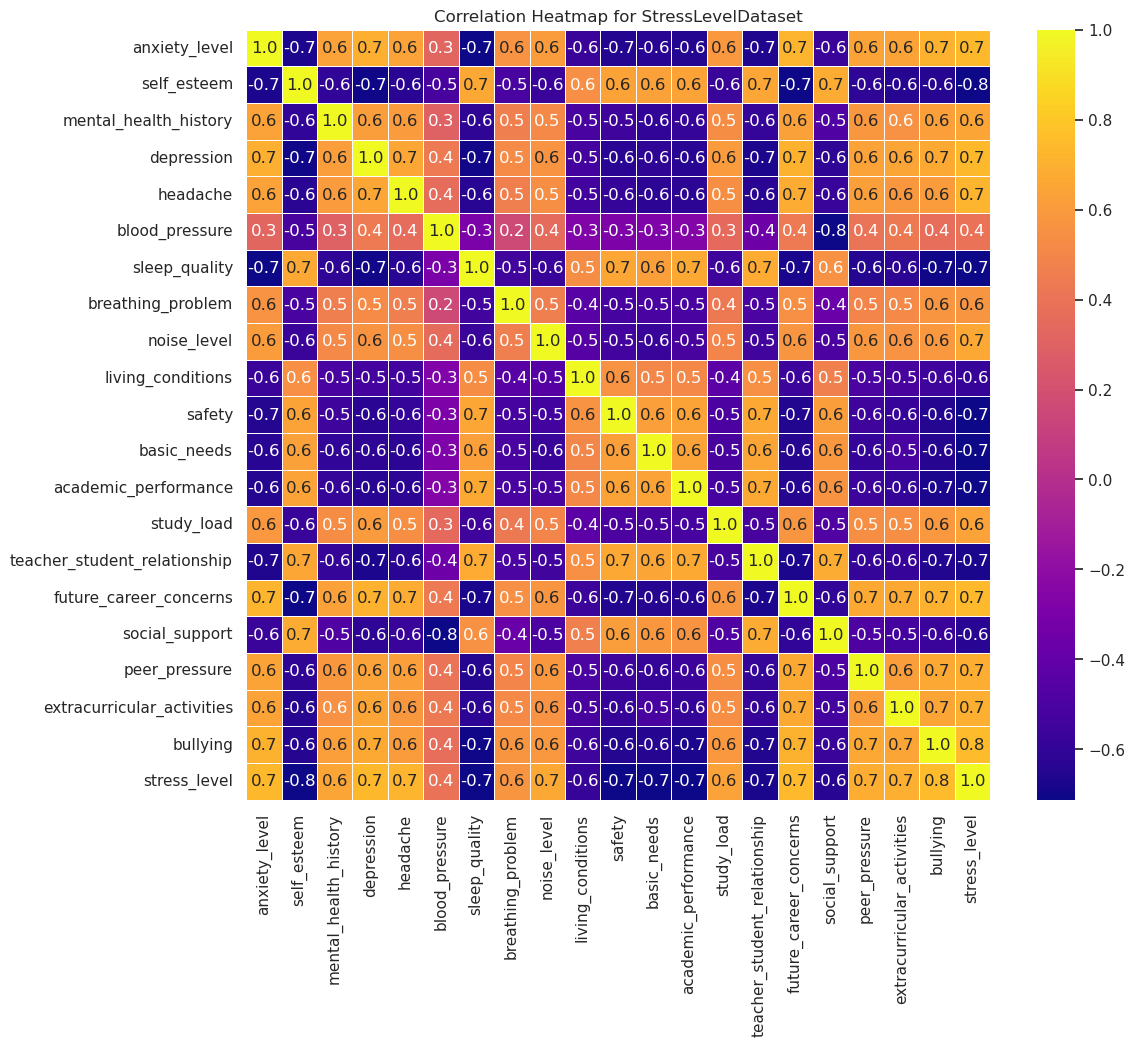

In [81]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='plasma', linewidth=.5, fmt=".1f", robust=True)
plt.title('Correlation Heatmap for StressLevelDataset')
plt.show()

### Model Development

Now, let's make a model to predict the stress level. From the correlation graph we can see the blood pressure has low value, so, let's drop that feature.

In [86]:
new_data = data.drop("blood_pressure", axis=1)

In [87]:
features = list(new_data.columns)
print(features)

['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']
